# TP Modélisation Stochastique - DATA731

## Question 1

*Créer deux séries de données temporelles y et z par simulation stochatsique selon les equations :*
*y1[k] + a1 * y1 * [k-1] + a2 * y1 * [k-2] = z1 [k]*
*y2[k] = sin(k * π / 16) + z2[k]*

*pour k = 0, 1, ...., 255 et où z1 et z2 représentent des réalisations d'un bruit blanc Gaussien centré de variance unité et :*
*[a1,a2] = [-0.0707,0.2500]*

In [44]:
import numpy as np

def simulate_y1_y2(a1, a2, num_points=256):
    # Initialisation des deux séries de données y1 et y2 avec num_points éléments de zéro
    y1 = np.zeros(num_points)
    y2 = np.zeros(num_points)
    
    # Génération de réalisations d'un bruit blanc Gaussien centré de variance unité pour z1 et z2
    z1 = np.random.normal(0, 1, num_points)
    z2 = np.random.normal(0, 1, num_points)

    # Boucle for pour calculer les valeurs de y1 et y2 pour k = 2 à num_points
    for k in range(2, num_points):
        # Calculation de y1[k] en utilisant la formule donnée
        y1[k] = z1[k] - a1 * y1[k-1] - a2 * y1[k-2]
        # Calculation de y2[k] en utilisant la formule donnée
        y2[k] = np.sin(k * np.pi / 16) + z2[k]

    # Retourne les séries de données générées
    return y1, y2



*Visualiser ces séries :*

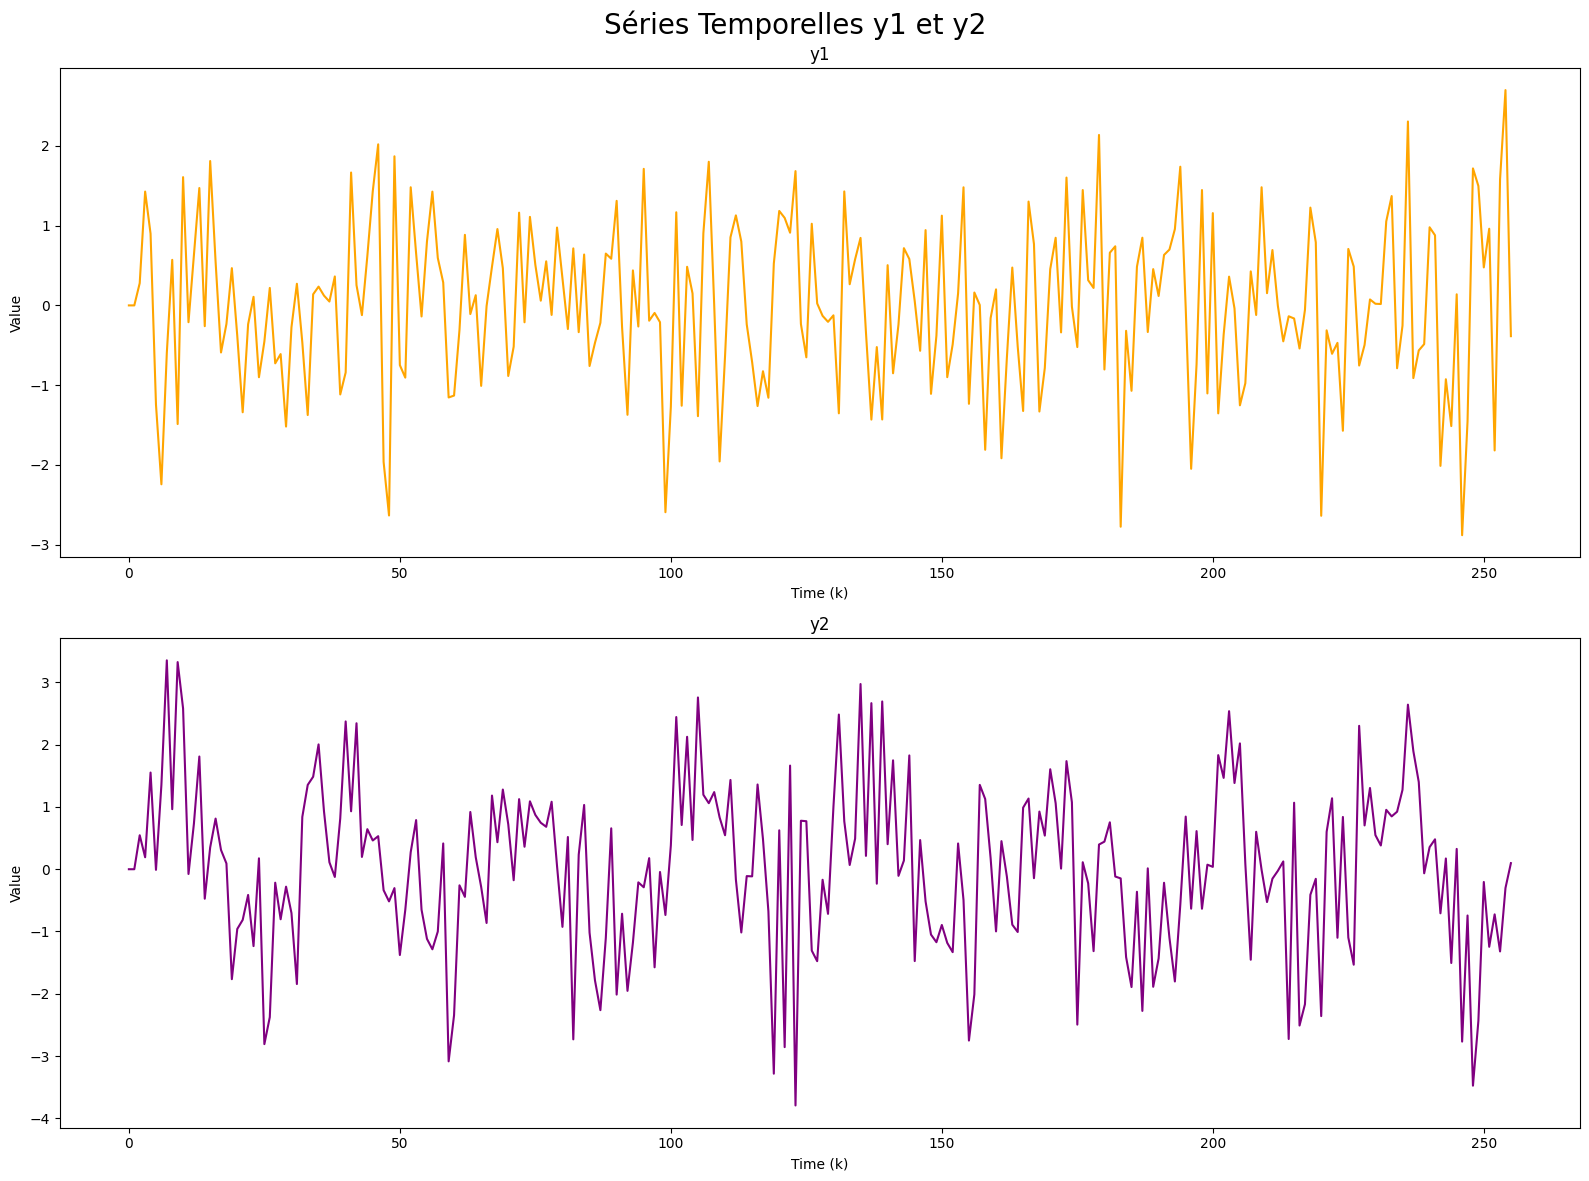

In [45]:
import matplotlib.pyplot as plt

# Valeurs des paramètres a1 et a2 données
a1 = -0.0707
a2 = 0.2500
# Appel de la fonction simulate_y1_y2 avec les valeurs de a1 et a2 pour générer les séries de données y1 et y2
y1, y2 = simulate_y1_y2(a1, a2)

# On crée un plot à deux subplots avec un ratio largeur/hauteur de 16/12.
fig, ax = plt.subplots(2, 1, figsize=(16, 12))

# On plot les valeurs de y1 dans le premier subplot.
ax[0].plot(y1, color='orange')
ax[0].set_title('y1')
ax[0].set_xlabel('Time (k)')
ax[0].set_ylabel('Value')

# On plot les valeurs de y2 dans le deuxième subplot.
ax[1].plot(y2, color='purple')
ax[1].set_title('y2')
ax[1].set_xlabel('Time (k)')
ax[1].set_ylabel('Value')

fig.suptitle('Séries Temporelles y1 et y2', fontsize=20)

# On optimise la mise en page.
plt.tight_layout()

# On affiche le plot.
plt.show()

*Ces séries sont-elles stationnaires ?*

Calcul des variances au cours de la série par interval de 10 valeurs pour voir globalement la série.

Les valeurs ne sont pas constantes mais reste assez proches. Les séries ne sont pas tout à fait stationnaires.

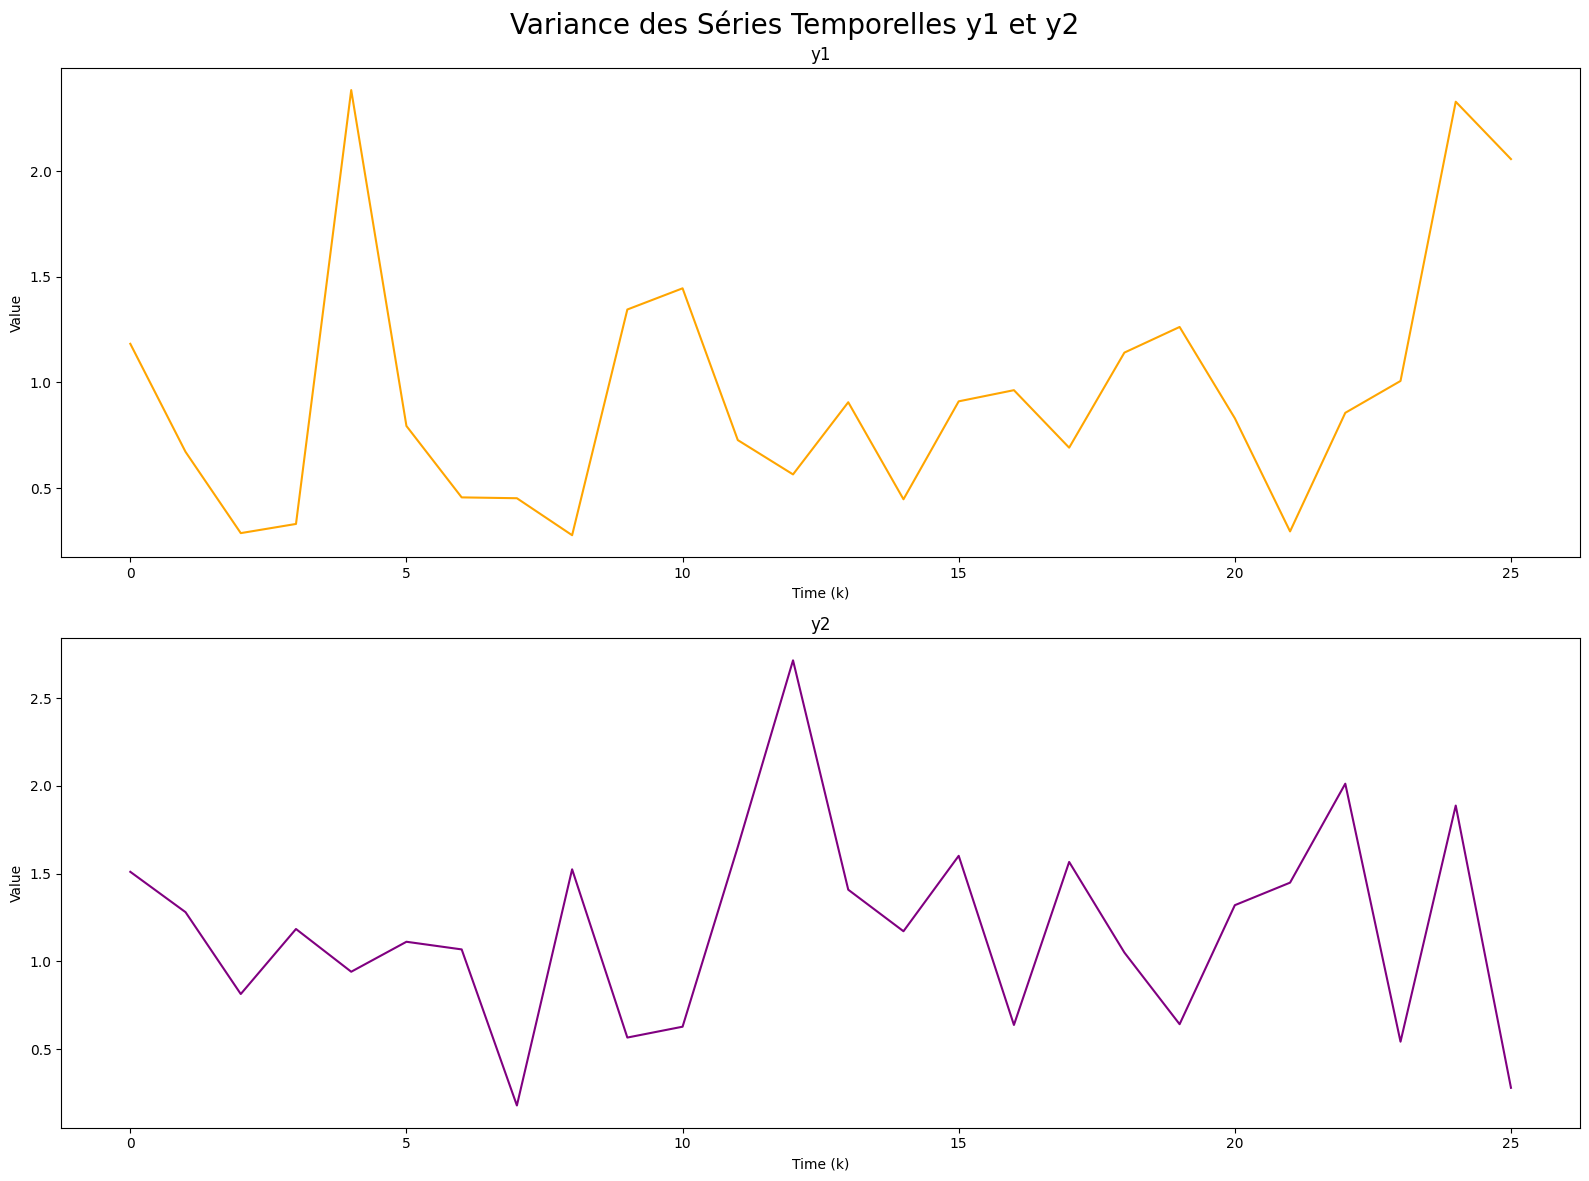

In [46]:
var_y1 = []
for i in range(0, len(y1), 10):
    var_y1.append(np.var(y1[i:i+10]))

var_y2 = []
for i in range(0, len(y2), 10):
    var_y2.append(np.var(y2[i:i+10]))

# On crée un plot à deux subplots avec un ratio largeur/hauteur de 16/12.
fig, ax = plt.subplots(2, 1, figsize=(16, 12))

# On plot les valeurs de y1 dans le premier subplot.
ax[0].plot(var_y1, color='orange')
ax[0].set_title('y1')
ax[0].set_xlabel('Time (k)')
ax[0].set_ylabel('Value')

# On plot les valeurs de y2 dans le deuxième subplot.
ax[1].plot(var_y2, color='purple')
ax[1].set_title('y2')
ax[1].set_xlabel('Time (k)')
ax[1].set_ylabel('Value')

fig.suptitle('Variance des Séries Temporelles y1 et y2', fontsize=20)

# On optimise la mise en page.
plt.tight_layout()

# On affiche le plot.
plt.show()


*Pour chacune d'entre elles, proposer un modèle stochastique qui soit pertinent tout en ayant très peu de paramètres.*

Modélisation des séries grâce à l'Autocovariance Empirique.

Les trois premières valeurs sont égales à 0, cela va créer un biais sur les 3 premières valeurs.

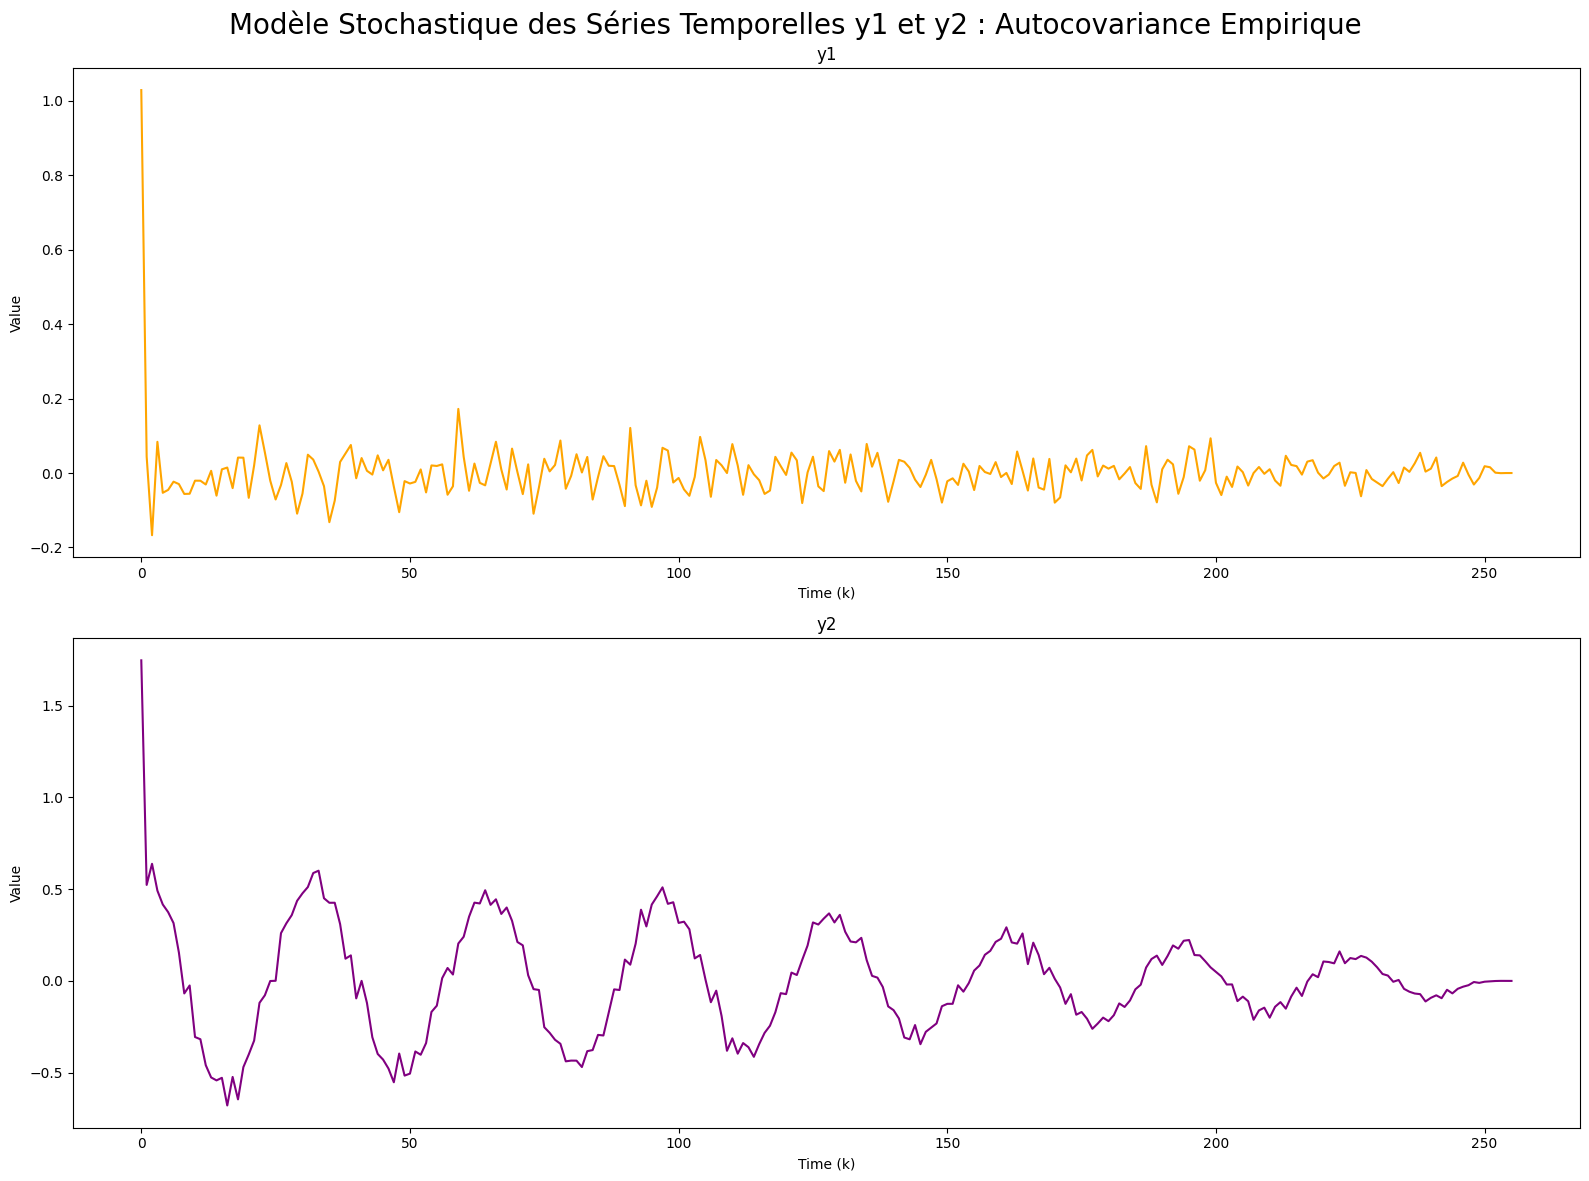

In [47]:
def auto_cov(data, n):
    """
    Cette fonction calcule l'autocovariance d'une série temporelle donnée.
    
    data : liste
        La série temporelle pour laquelle nous souhaitons calculer la covariance autocorrélée.
    n : int
        La longueur de la série temporelle.
        
    Retourne :
        La liste contenant les valeurs de l'autocovariance.
    """
    mean = sum(data) / len(data)
    autocov= []
    for i in range(len(data)):
        somme = []
        for j in range(1,n-i):
            # Calcul de l'autocovariance.
            somme.append((data[j] - mean) * (data[j + i] - mean))
        autocov.append(1/n * sum(somme))
    return autocov

# Calcul des autocovariances pour y1 et y2.
autocov_y1 = auto_cov(y1, len(y1))
autocov_y2 = auto_cov(y2, len(y2))


# On crée un plot à deux subplots avec un ratio largeur/hauteur de 16/12.
fig, ax = plt.subplots(2, 1, figsize=(16, 12))

# On plot les valeurs de y1 dans le premier subplot.
ax[0].plot(autocov_y1, color='orange')
ax[0].set_title('y1')
ax[0].set_xlabel('Time (k)')
ax[0].set_ylabel('Value')

# On plot les valeurs de y2 dans le deuxième subplot.
ax[1].plot(autocov_y2, color='purple')
ax[1].set_title('y2')
ax[1].set_xlabel('Time (k)')
ax[1].set_ylabel('Value')

fig.suptitle('Modèle Stochastique des Séries Temporelles y1 et y2 : Autocovariance Empirique', fontsize=20)

# On optimise la mise en page.
plt.tight_layout()

# On affiche le plot.
plt.show()

## Question 2

*Créer une série données y constituée par la somme des deux processus synthétisés dans la question 1. Visualiser cette série.*

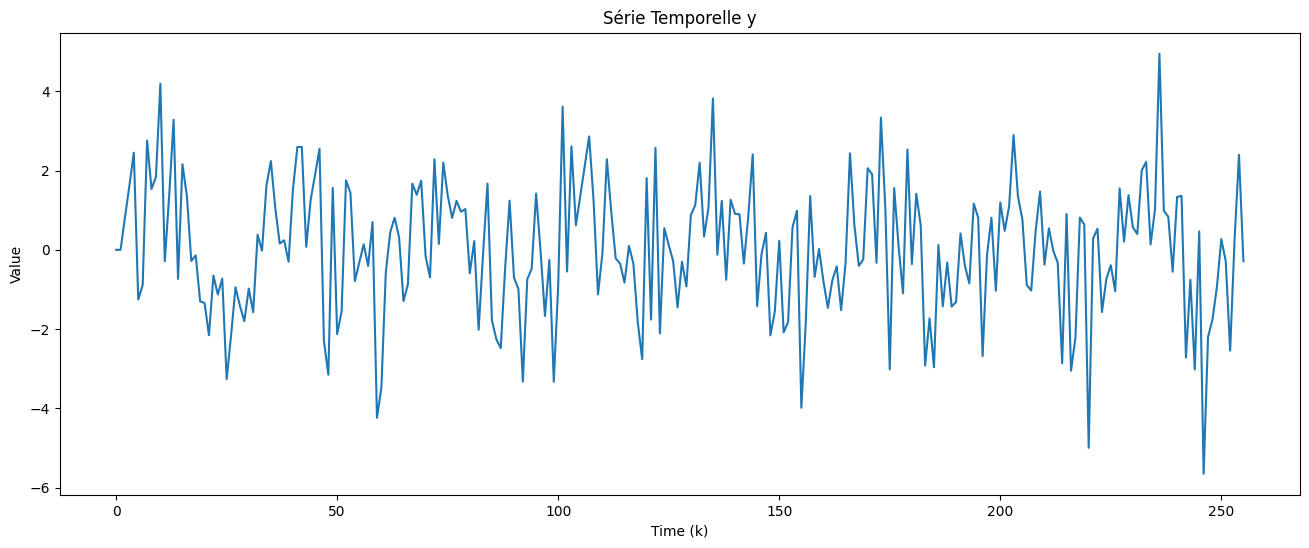

In [48]:
# Calcul de la série temporelle y en additionnant les séries de données y1 et y2
y = y1 + y2

# Visualisation de la série temporelle y
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(y)
ax.set_title('Série Temporelle y')
ax.set_xlabel('Time (k)')
ax.set_ylabel('Value')
plt.show()

*Proposer un modèle stochastique pour cette série, ainsi qu'une procédure d'estimation des paramètres de ce modèle.*

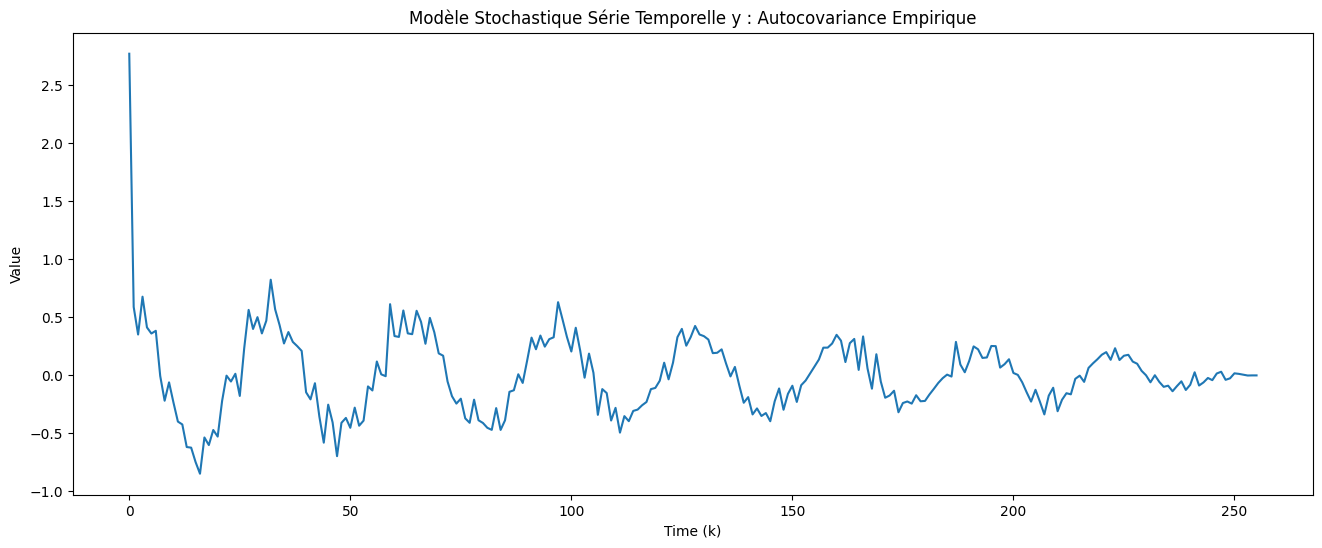

In [49]:
# Calcul de l'autocovariance de y.
autocov_y = auto_cov(y, len(y))

# Visualisation de la série temporelle y
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(autocov_y)
ax.set_title('Modèle Stochastique Série Temporelle y : Autocovariance Empirique')
ax.set_xlabel('Time (k)')
ax.set_ylabel('Value')

plt.show()

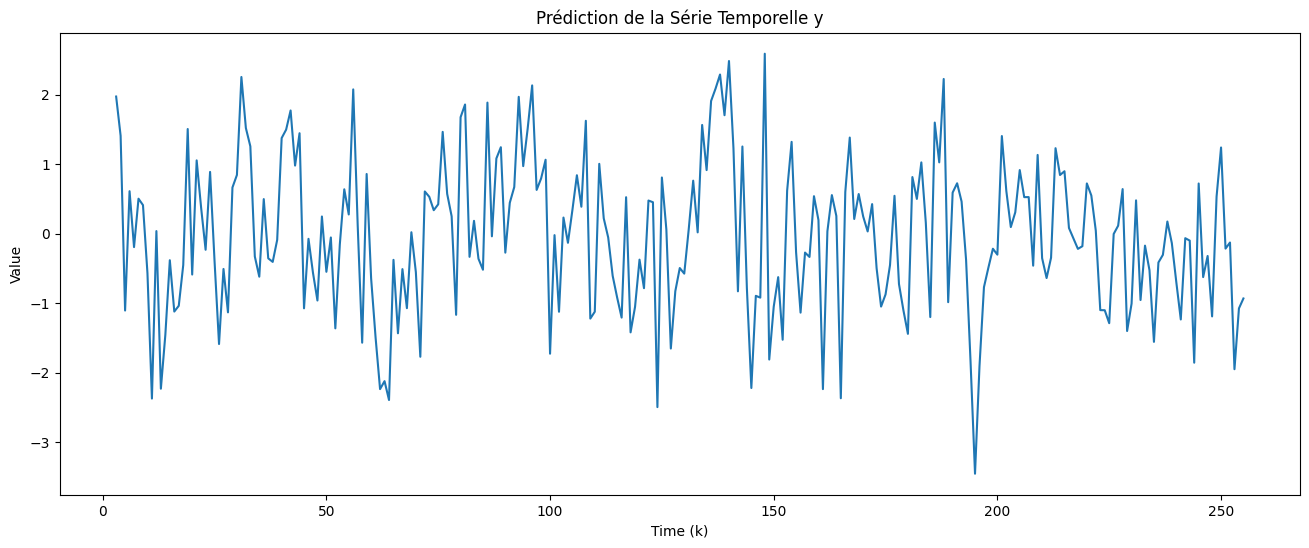

In [50]:
import random

autocor_y = [autocov_y[k] /autocov_y[0] for k in range(len(autocov_y))]

def estim_ar(auto_cor):
    elt = np.array([[auto_cor[0], auto_cor[1]], [auto_cor[1], auto_cor[0]]])
    r = -np.array([auto_cor[1], auto_cor[2]])
    return np.dot(np.linalg.inv(elt), r)

n = len(autocor_y)
predict_y, x = [0 for i in range(n)], [i for i in range(n)]
coeff_y = estim_ar(autocor_y)
for i in range(1, n-1):
    predict_y[i + 1] = random.gauss(0, 1) - coeff_y[0] * predict_y[i] - coeff_y[1] * predict_y[i - 1]

predict_y = predict_y[3:]

# Visualisation de la prédiction série temporelle y
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(x[3:],predict_y)
ax.set_title('Prédiction de la Série Temporelle y')
ax.set_xlabel('Time (k)')
ax.set_ylabel('Value')
plt.show()


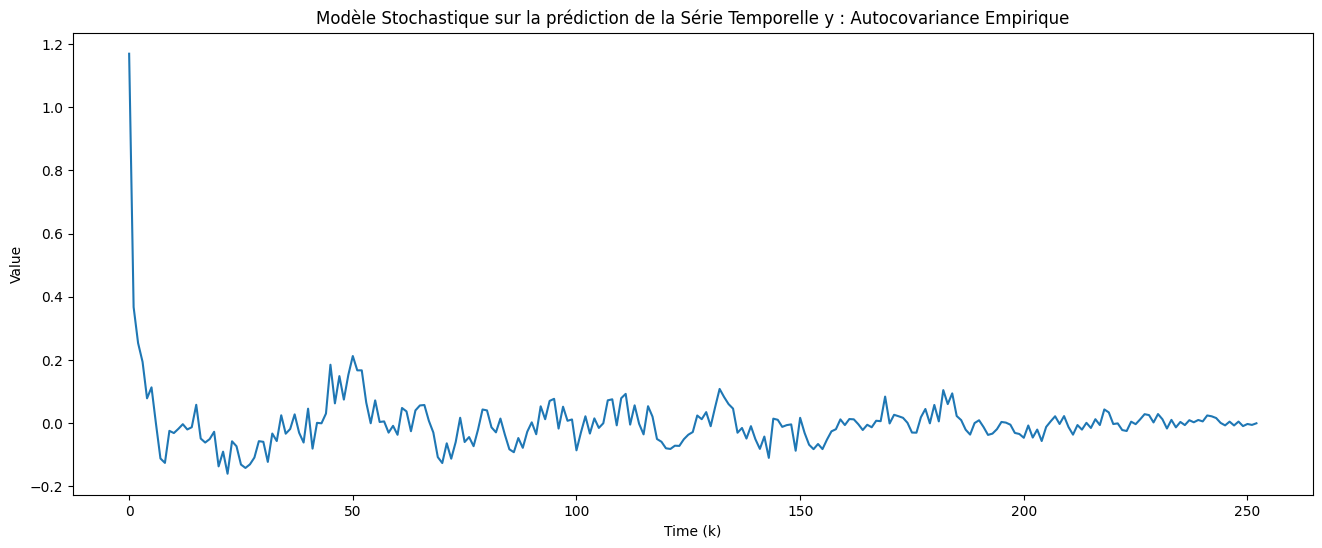

In [51]:
# Calcul de l'autocovariance de la prédiction de y.
autocov_predict_y = auto_cov(predict_y, len(predict_y))

# Visualisation de la prédiction de la série temporelle y
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(autocov_predict_y)
ax.set_title('Modèle Stochastique sur la prédiction de la Série Temporelle y : Autocovariance Empirique')
ax.set_xlabel('Time (k)')
ax.set_ylabel('Value')

plt.show()

## Question 3

*Créer une série données z par juxtaposition des 2 séries y1,y2 définies ci-dessus. Visualiser cette série.*

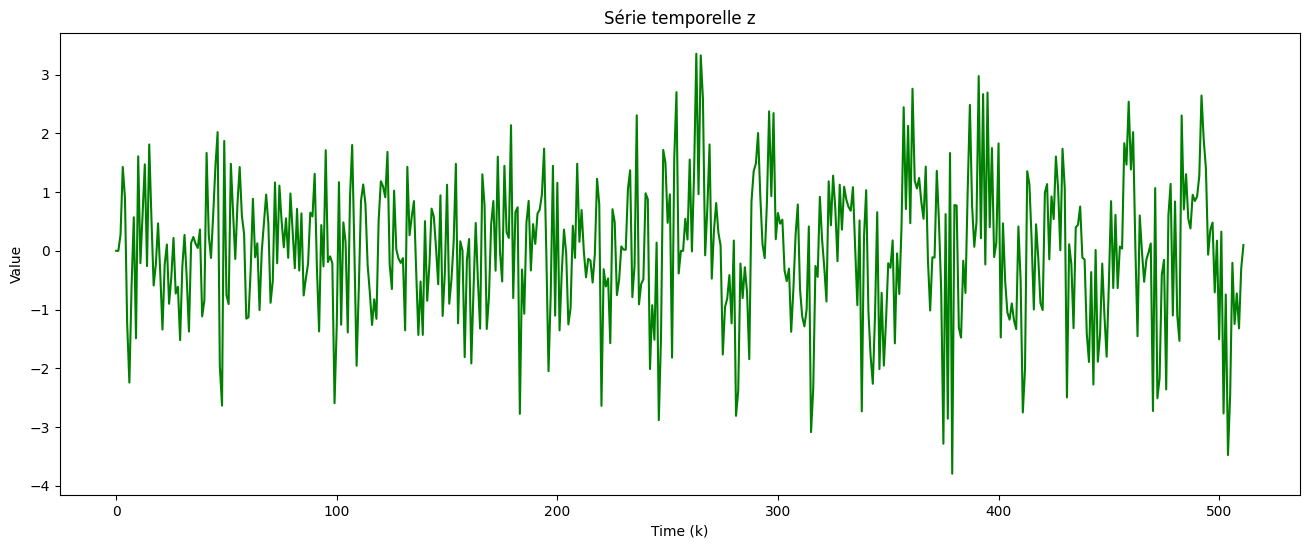

In [52]:
# Calcul de la série temporelle z en concaténant les séries de données y1 et y2
z = np.concatenate([y1, y2])

# Visualisation de la série temporelle z
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(z, color='green')
ax.set_title('Série temporelle z')
ax.set_xlabel('Time (k)')
ax.set_ylabel('Value')

plt.show()

*Proposer un modèle stochastique pour cette série, ainsi qu'une procédure d'estimation des paramètres de ce modèle.*

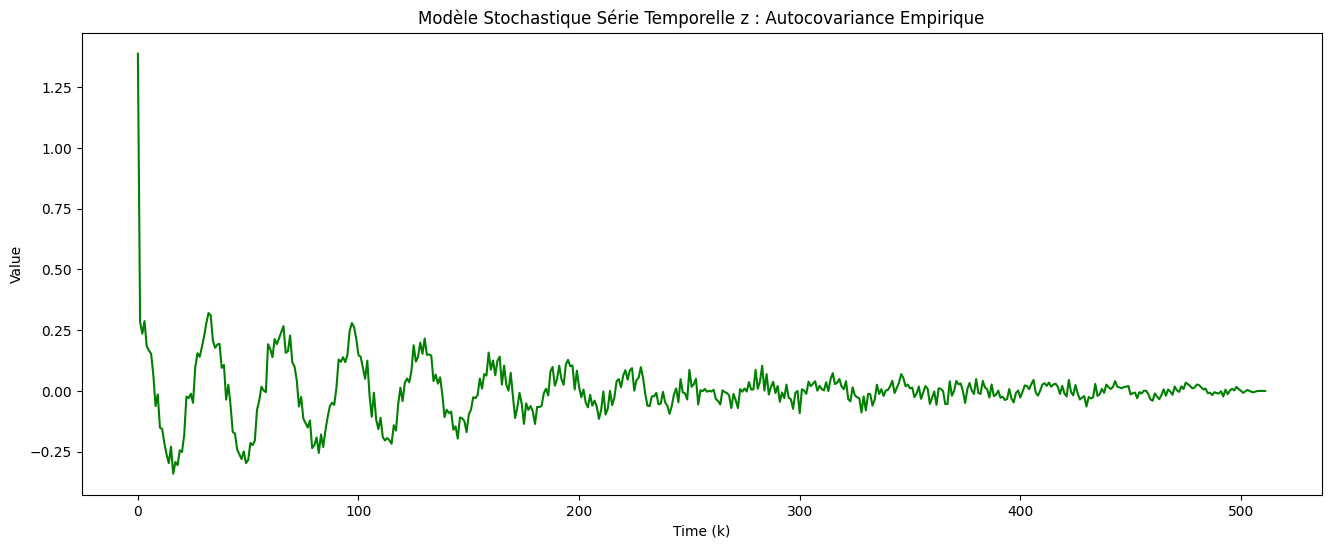

In [53]:
# Calcul de l'autocovariance de z.
autocov_z = auto_cov(z, len(z))

# Visualisation de la série temporelle z
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(autocov_z, color='green')
ax.set_title('Modèle Stochastique Série Temporelle z : Autocovariance Empirique')
ax.set_xlabel('Time (k)')
ax.set_ylabel('Value')

plt.show()

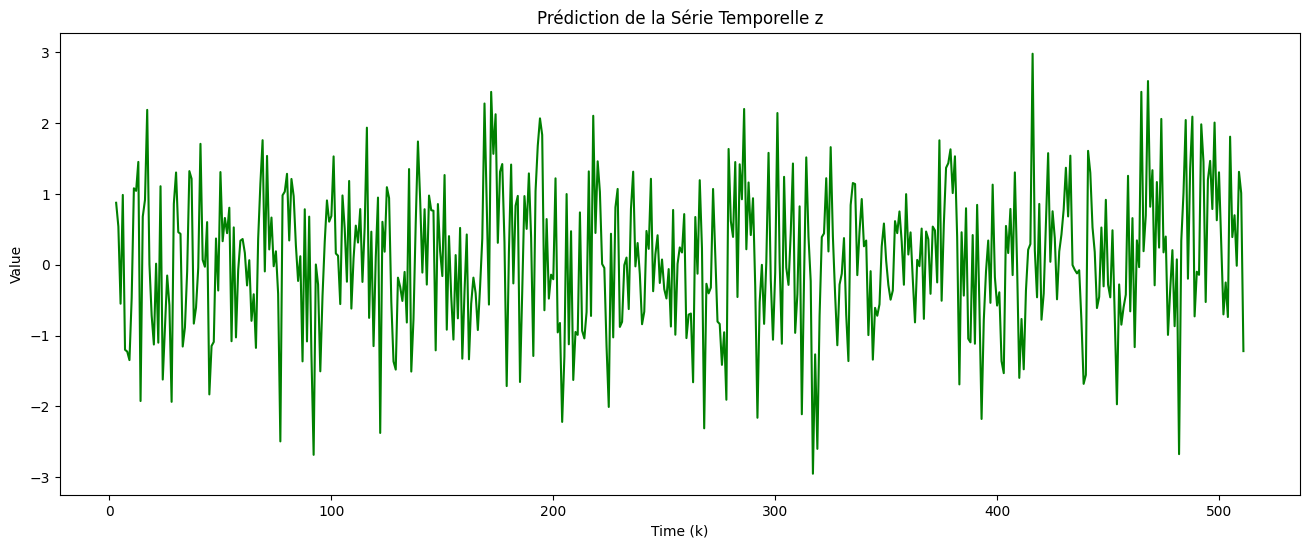

In [54]:
autocor_z = [autocov_z[k] /autocov_z[0] for k in range(len(autocov_z))]

n = len(autocor_z)
predict_z, x = [0 for i in range(n)], [i for i in range(n)]
coeff_z = estim_ar(autocor_z)
for i in range(1, n-1):
    predict_z[i + 1] = random.gauss(0, 1) - coeff_z[0] * predict_z[i] - coeff_z[1] * predict_z[i - 1]

predict_z = predict_z[3:]

# Visualisation de la prédiction série temporelle z
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(x[3:],predict_z, color='green')
ax.set_title('Prédiction de la Série Temporelle z')
ax.set_xlabel('Time (k)')
ax.set_ylabel('Value')
plt.show()


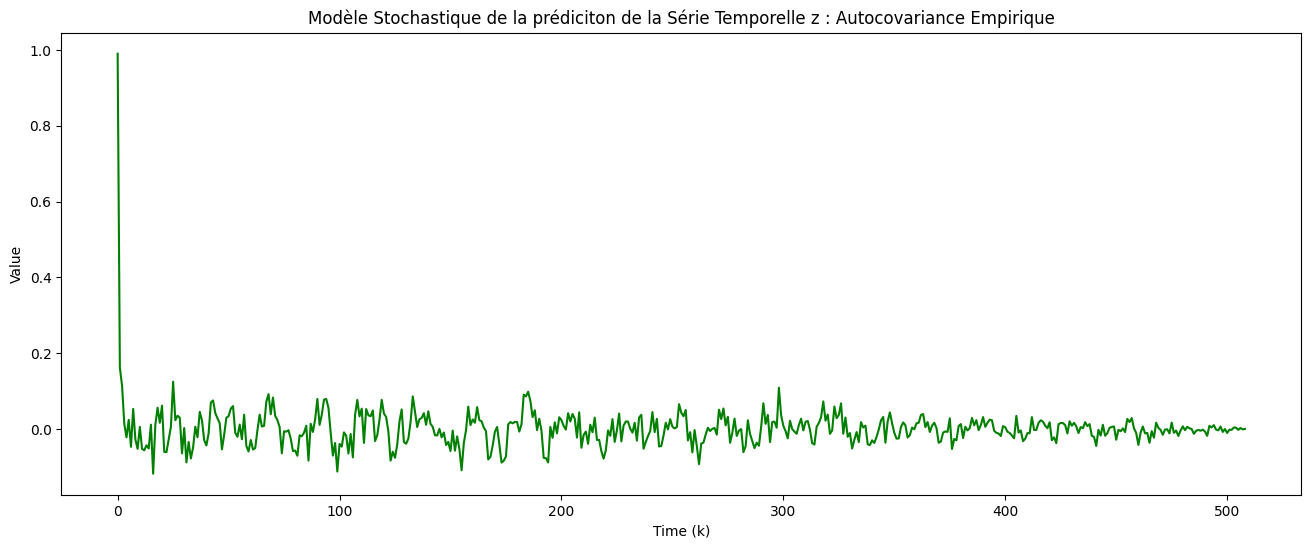

In [55]:
# Calcul de l'autocovariance de la prédiction de z.
autocov_predict_z = auto_cov(predict_z, len(predict_z))

# Visualisation de la prédiction de la série temporelle z
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(autocov_predict_z, color='green')
ax.set_title('Modèle Stochastique de la prédiciton de la Série Temporelle z : Autocovariance Empirique')
ax.set_xlabel('Time (k)')
ax.set_ylabel('Value')

plt.show()